# Part 1 - Introduction to GeoEnrichment

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Started</a></span><ul class="toc-item"><li><span><a href="#Object-Model-Diagram" data-toc-modified-id="Object-Model-Diagram-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Object Model Diagram</a></span></li><li><span><a href="#Ways-to-enrich-your-data" data-toc-modified-id="Ways-to-enrich-your-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ways to enrich your data</a></span></li></ul></li><li><span><a href="#Quick-Example" data-toc-modified-id="Quick-Example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quick Example</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

GeoEnrichment adds location intelligence to the data by providing facts about a location or an area. Using GeoEnrichment, you can get information about the people and places in a specific area or within a certain distance or drive time from a location. It enables you to query and use information from a large collection of data sets including population, income, housing, consumer behavior, and the natural environment. GeoEnrichment enables you to answer questions about locations that you can't answer with maps alone. For example: What kind of people live here? What do people like to do in this area? What are their habits and lifestyles?

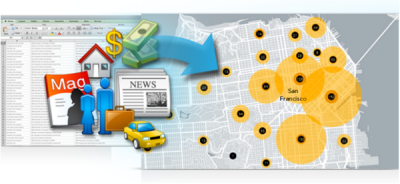

GeoEnrichment makes your analysis more powerful by adding global demographic, spending, lifestyle or business features at different geographical levels such as city, county, region, state and country. Demographic features (Population, Age, Education etc.) and Socio-economic features (Income, Education, Wealth etc.) can be easily added to your location data, making it more intelligent. Feature Engineering is one of the key aspects of any Data Science project as it involves adding new features to the data to increase the predictive power of a learning algorithm. With GeoEnrichment, you can quickly add more features to your location data, helping your algorithms make better predictions.

To understand how GeoEnrichment adds value, let's imagine that a retail giant is evaluating potential sites to open new stores where the conditions for evaluation include competition, traffic, economic feasibility and market potential of different geographic areas. With GeoEnrichment, they can dig into at an average shoppers' lifestyle, income, spending, education and other socio-demographic factors for different neighborhoods to understand their potential customers and make an educated decision when choosing new sites.

## Getting Started
A user must be logged on to a GIS in order to use GeoEnrichment. Geoenrichment functionality is available in the `arcgis.geoenrichment` module. 

To enable GeoEnrichment, an ArcGIS Online subscription is needed or ArcGIS Enterprise needs to be configured with GeoEnrichment utility service. GeoEnrichment operations consume credits. Credits are the currency used across ArcGIS and are consumed for specific transactions. Learn more about credit consumption for GeoEnrichment [here](https://doc.arcgis.com/en/arcgis-online/administer/credits.htm#ESRI_SECTION1_709121D2C7694DCAB9B8592F36F7A5BA).

### Object Model Diagram

The picture below illustrates how `geoenrichment` module is organized.

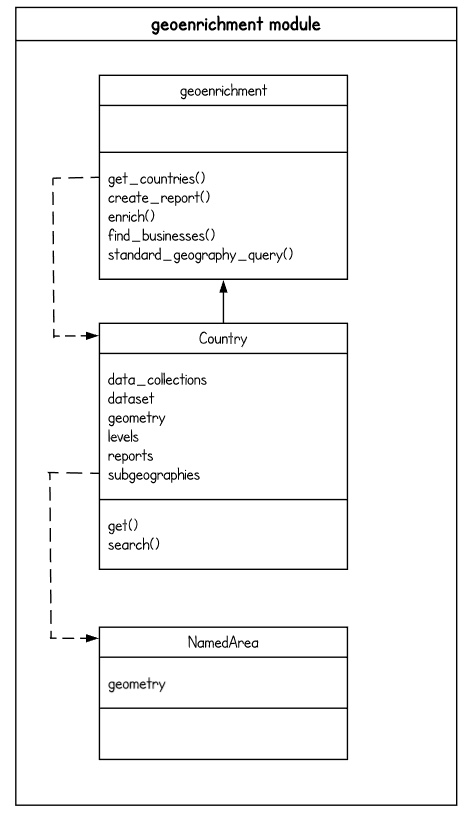

### Ways to enrich your data

You can enrich your data in 2 ways:
1. `enrich()` method from `arcgis.geoenrichment` module.
2. [enrich_layer( )](https://developers.arcgis.com/python/api-reference/arcgis.features.enrich_data.html#enrich-layer) method from the features module.

The `enrich()` method returns a Spatiallly Enabled Data Frame. This data frame can be saved as a new feature layer Item in your GIS and used for analysis or visualization on a map. However, if you would like to enrich an existing FeatureLayer, then use the `enrich_layer()` method from the `arcgis.features` module. The result will be a new layer of input features that includes enriched data.

## Quick Example

Let's look at a simple example of `GeoEnrichment` in action. Suppose a company wants to open a healthcare facility somewhere in Los Angeles, CA. They have a sample dataset of existing healthcare providers with their address details for the target areas (represented by their zip codes). The company wants to understand the demographics of each zip code to make the right decision. 

Let's import this data and make it richer with `GeoEnrichment`. 

In [1]:
# Import Libraries
import pandas as pd
from arcgis.gis import GIS
from arcgis.geoenrichment import Country

In [3]:
# Create a GIS Connection
gis = GIS(profile='your_online_profile')

In [5]:
# Read the data
df = pd.read_csv('../data/health.csv')
df

,Number of Beds,Name,Address,City,State,Zip Code
0,156,Facility 1,2468 SOUTH ST ANDREWS PLACE,LOS ANGELES,CA,90018
1,59,Facility 2,2300 W. WASHINGTON BLVD.,LOS ANGELES,CA,90018
2,25,Facility 3,4060 E. WHITTIER BLVD.,LOS ANGELES,CA,90023
3,49,Facility 4,6070 W. PICO BOULEVARD,LOS ANGELES,CA,90035
4,55,Facility 5,1480 S. LA CIENEGA BL,LOS ANGELES,CA,90035


> This dataset shows 5 providers with their address details. The providers are located in Zip Codes 90018, 90023 and 90035.

Let's `enrich` this dataset with socio-demographic factors such as `Total Population, Median Age, Median Household Income, Diversity Index, Education` for each zip code to better understand these areas.

In [6]:
# Define Analysis variables
analysis_variables = [
    'TOTPOP_CY',  # Population: Total Population (Esri)
    'DIVINDX_CY', # Diversity Index (Esri)
    'AVGHHSZ_CY', # Average Household Size (Esri)
    'MEDAGE_CY',  # Age: Median Age (Esri)
    'MEDHINC_CY', # Income: Median Household Income (Esri)
    'BACHDEG_CY', # Education: Bachelor's Degree (Esri)
]

In [7]:
# Get enriched data for each zip code
from arcgis.geoenrichment import *

usa = Country.get('US')
zip1 = usa.subgeographies.states['California'].zip5['90018']
zip2 = usa.subgeographies.states['California'].zip5['90023']
zip3 = usa.subgeographies.states['California'].zip5['90035']

enrich_df = enrich(study_areas=[zip1, zip2, zip3], analysis_variables=analysis_variables)

enrich_df

,ID,OBJECTID,StdGeographyLevel,StdGeographyName,StdGeographyID,sourceCountry,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,TOTPOP_CY,DIVINDX_CY,AVGHHSZ_CY,MEDAGE_CY,MEDHINC_CY,BACHDEG_CY,SHAPE
0,0,1,US.ZIP5,Los Angeles,90018,US,Query:US.ZIP5,2.191,2.576,1,52420,91.6,3.16,34.0,42741,4996,"{""rings"": [[[-118.30899000030098, 34.039920000..."
1,1,2,US.ZIP5,Los Angeles,90023,US,Query:US.ZIP5,2.191,2.576,1,48673,76.9,4.29,29.1,43056,1367,"{""rings"": [[[-118.2062542231383, 34.0348220536..."
2,2,3,US.ZIP5,Los Angeles,90035,US,Query:US.ZIP5,2.191,2.576,1,30187,59.0,2.25,38.8,88405,7848,"{""rings"": [[[-118.37619999961632, 34.059440000..."


In [9]:
# Merge provider data with GeoEnrichment data
df['Zip Code'] = df['Zip Code'].apply(str)
merged = pd.merge(enrich_df, df, left_on='StdGeographyID',right_on='Zip Code')

In [13]:
merged.iloc[:,-10:]

,MEDAGE_CY,MEDHINC_CY,BACHDEG_CY,SHAPE,Number of Beds,Name,Address,City,State,Zip Code
0,34.0,42741,4996,"{'rings': [[[-118.30899000030098, 34.039920000...",156,Facility 1,2468 SOUTH ST ANDREWS PLACE,LOS ANGELES,CA,90018
1,34.0,42741,4996,"{'rings': [[[-118.30899000030098, 34.039920000...",59,Facility 2,2300 W. WASHINGTON BLVD.,LOS ANGELES,CA,90018
2,29.1,43056,1367,"{'rings': [[[-118.2062542231383, 34.0348220536...",25,Facility 3,4060 E. WHITTIER BLVD.,LOS ANGELES,CA,90023
3,38.8,88405,7848,"{'rings': [[[-118.37619999961632, 34.059440000...",49,Facility 4,6070 W. PICO BOULEVARD,LOS ANGELES,CA,90035
4,38.8,88405,7848,"{'rings': [[[-118.37619999961632, 34.059440000...",55,Facility 5,1480 S. LA CIENEGA BL,LOS ANGELES,CA,90035


__Visualize on a map__

Let's visualize the 3 zip codes on a map.


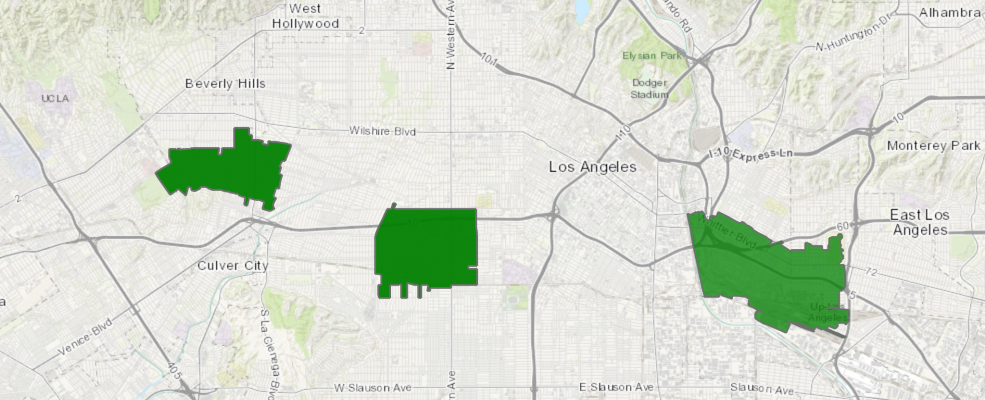

In [11]:
map1 = gis.map('Los Angeles, CA',12)
map1

In [9]:
# Plot on map
merged.spatial.plot(map1)

True

> With enriched data, we can now make the following observations about these zip codes:
1. Zip Code 90018 seems to have lowest median income, higher total population and few people with bachelor's degree.
2. Zip Code 90023 also has lower median income, higher total population and very few people with bachelor's degree.
3. Zip Code 90035 contradicts others with higher median income, lower total population and more people with bachelor's degree.

Which zip code should the company pick? Using geoenriched data, this company can now make the right decision depending on the type of healthcare facility they want to open. 

_By enriching data with a few socio-demographic factors, we just prevented a company from throwing away millions of dollars... well sort of! Imagine all the great things you can now accomplish with `GeoEnrichment` and stay tuned because we are just getting started._

## Conclusion

GeoEnrichment makes any location data intelligent by providing facts about the location. In this part of the Geoenrichment guide series, you have seen a high-level example of how `arcgis.geoenrichment` module can be used to `enrich` a dataset with various socio-demographic features, and also an introduction of the different ways in which data can be enriched. In the subsequent pages, you will learn about:
1. [Enriching Study Areas](part2_enrich_study_areas.ipynb) (explains where to enrich)
2. [Exploring Named Statistical Areas](part3_explore_named_areas.ipynb) (explains where to enrich continued)
3. [Enriching Data Collections and Spatially Enabled Dataframe](part4_enrich_collections_and_sedf.ipynb) (explains what datasets/variables to enrich with)
4. [Generating Reports](part5_generate_reports.ipynb)
5. [Standard Geography Queries](part6_std_geo_query.ipynb)